# CS5720J – Applications of Data Science
## Coursework 1: Data Preparation and Transformation
**Author:** Ipek Kaya  
**Date:** 10.06.2025

## 1. Introduction
In this notebook we will perform data preparation on the selected dataset, which is 'HousePrices2025'. This process includes the cleaning and transformation of the dataset. 
The main goal is to preprocess the data, such that it is suitable for further analysis and application of machine learning tasks.
The dataset initially contains 69,354 house samples and 18 features.

## 2. Data Loading and Initial Exploration
We start by loading the dataset and inspecting its basic properties.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from numpy import nan
from sklearn.ensemble import IsolationForest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Importing the dataset
df = pd.read_csv('./HousePrice/HousePrice2025.csv')

In [3]:
#Observing the first 5 rows of the DataFrame.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"Lovely large room, Bethnal Green",264345,Susie,NaN,Tower Hamlets,51.52874,-0.05396,Private room,55.0,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56861,-0.11270,Private room,50.0,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,COSY STUDIO-FLAT WITH A GREAT VIEW,1481412,Luca,NaN,Tower Hamlets,51.52851,-0.07426,Entire home/apt,90.0,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,A Luxury Studio Suite in Clerkenwell,259088,Simon,NaN,Islington,51.52478,-0.10484,Private room,180.0,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,Notting Hill church stay in Heaven!,1481851,Tania,NaN,Kensington and Chelsea,51.51464,-0.20004,Entire home/apt,297.0,14,6,2022-07-04,0.05,1,180,2,NaN


In [4]:
#Here we see the name of all the columns/features we are working with
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
#With this we obtain a summary where we see the Dtype of the columns, number of rows and columns, column names, number of non-missing (non-null) values per column, memory usage of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69354 entries, 0 to 69353
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69354 non-null  int64  
 1   name                            69333 non-null  object 
 2   host_id                         69354 non-null  int64  
 3   host_name                       69349 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   69354 non-null  object 
 6   latitude                        69354 non-null  float64
 7   longitude                       69354 non-null  float64
 8   room_type                       69354 non-null  object 
 9   price                           69352 non-null  float64
 10  minimum_nights                  69354 non-null  int64  
 11  number_of_reviews               69354 non-null  int64  
 12  last_review                     

In [6]:
#this code gives the summary statistics of the features. include='all' allows us to see both the numerical values and categorical ones.
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.935400e+04,69333,6.935400e+04,69349,0.0,69354,69354.000000,69354.000000,69354,6.935200e+04,69354.000000,69354.00000,52573,52573.000000,69354.000000,69354.000000,69354.000000,0.0
unique,NaN,67029,NaN,13043,NaN,33,NaN,NaN,4,NaN,NaN,NaN,2728,NaN,NaN,NaN,NaN,NaN
top,NaN,✿♫✯Very Nice Room Near Red Cross Garden Park✯♫✿,NaN,Alex,NaN,Westminster,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2022-09-04,NaN,NaN,NaN,NaN,NaN
freq,NaN,115,NaN,523,NaN,7764,NaN,NaN,41227,NaN,NaN,NaN,1215,NaN,NaN,NaN,NaN,NaN
mean,1.373935e+17,NaN,1.242270e+08,NaN,NaN,NaN,51.509544,-0.128486,NaN,1.932292e+02,5.997275,17.53635,NaN,0.882617,11.987081,108.520691,4.734291,NaN
std,2.651657e+17,NaN,1.377255e+08,NaN,NaN,NaN,0.049181,0.100957,NaN,4.238657e+03,25.708984,40.41003,NaN,1.274492,37.148090,132.821983,12.032264,NaN
min,1.391300e+04,NaN,4.775000e+03,NaN,NaN,NaN,51.272480,-0.523600,NaN,-6.000000e+01,-1.000000,0.00000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.810130e+07,NaN,1.870718e+07,NaN,NaN,NaN,51.483140,-0.189518,NaN,5.500000e+01,1.000000,1.00000,NaN,0.120000,1.000000,0.000000,0.000000,NaN
50%,3.395527e+07,NaN,6.010350e+07,NaN,NaN,NaN,51.513600,-0.126195,NaN,1.000000e+02,2.000000,4.00000,NaN,0.430000,1.000000,32.000000,0.000000,NaN
75%,5.266016e+07,NaN,1.961185e+08,NaN,NaN,NaN,51.539707,-0.068550,NaN,1.800000e+02,4.000000,16.00000,NaN,1.080000,4.000000,228.000000,5.000000,NaN


## 3. Data Cleaning
This section addresses missing values, duplicates, and outlier detection.

**first we check and correct for any spaces and upper case letters**

In [7]:
# Removing any spaces and replacing with underscores and changing capitals to lower case values
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,106332,"lovely_large_room,_bethnal_green",264345,susie,NaN,tower_hamlets,51.52874,-0.05396,private_room,55.0,3,65,2016-06-10,0.47,1,74,0,NaN
1,13913,holiday_london_db_room_let-on_going,54730,alina,NaN,islington,51.56861,-0.11270,private_room,50.0,1,30,2022-07-15,0.20,2,343,9,NaN
2,284532,cosy_studio-flat_with_a_great__view,1481412,luca,NaN,tower_hamlets,51.52851,-0.07426,entire_home/apt,90.0,5,42,2022-01-04,0.34,1,222,1,NaN
3,107048,a_luxury_studio_suite_in_clerkenwell,259088,simon,NaN,islington,51.52478,-0.10484,private_room,180.0,4,493,2022-09-02,3.59,5,236,20,NaN
4,284603,notting_hill_church_stay_in_heaven!,1481851,tania,NaN,kensington_and_chelsea,51.51464,-0.20004,entire_home/apt,297.0,14,6,2022-07-04,0.05,1,180,2,NaN


**CHECKING DUPLICATES IN THE DATA**

In [8]:
# Here we count all accounts of duplicated rows in the DataFrame,including all occurrences.
df.duplicated(keep=False).sum()

5

In [9]:
# A new DataFrame containing only the duplicated rows, including all copies of each duplicate.
df[df.duplicated(keep=False)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
61468,655626648506377891,"luxury_2_bedroom_waterfront_apartment,_london_e14",454802909,anne,NaN,tower_hamlets,51.497808,-0.018368,entire_home/apt,309.0,2,2,2022-08-04,1.5,3,11,2,NaN
61469,655626648506377891,"luxury_2_bedroom_waterfront_apartment,_london_e14",454802909,anne,NaN,tower_hamlets,51.497808,-0.018368,entire_home/apt,309.0,2,2,2022-08-04,1.5,3,11,2,NaN
61470,655626648506377891,"luxury_2_bedroom_waterfront_apartment,_london_e14",454802909,anne,NaN,tower_hamlets,51.497808,-0.018368,entire_home/apt,309.0,2,2,2022-08-04,1.5,3,11,2,NaN
68486,710681903042537303,amazing_2_beds_and_2_baths_near_hyde_park,478386457,seif,NaN,westminster,51.514263,-0.162356,entire_home/apt,300.0,1,0,NaN,NaN,1,333,0,NaN
68487,710681903042537303,amazing_2_beds_and_2_baths_near_hyde_park,478386457,seif,NaN,westminster,51.514263,-0.162356,entire_home/apt,300.0,1,0,NaN,NaN,1,333,0,NaN


In [10]:
# Removing duplicate rows from the DataFrame, keeping only the first occurrence of each duplicate.
df = df.drop_duplicates(keep='first')

In [11]:
#Checking to see if all duplicates are removed.
df.duplicated(keep=False).sum()

0

In [12]:
#Looking at the number of unique values in each column of the DataFrame.
df.nunique()

id                                69351
name                              66404
host_id                           45229
host_name                         13030
neighbourhood_group                   0
neighbourhood                        33
latitude                          28648
longitude                         38106
room_type                             4
price                              1416
minimum_nights                      125
number_of_reviews                   434
last_review                        2728
reviews_per_month                   841
calculated_host_listings_count       77
availability_365                    366
number_of_reviews_ltm               157
license                               0
dtype: int64

In [13]:
# Loop through each column to calculate how many unique values they have and the percentage of the total number of rows these unique values represent. Print if this is less than 1%. 
for i in range(df.shape[1]):
    num = df.nunique()[i]
    percentage = float(num) / df.shape[0] * 100
    if percentage <= 1:
        print('%d, %d, %.1f%%' % (i, num, percentage))

/var/folders/ty/47wsyy_916d2ftsgbw8v8wxc0000gn/T/ipykernel_1907/2534519268.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num = df.nunique()[i]


4, 0, 0.0%
5, 33, 0.0%
8, 4, 0.0%
10, 125, 0.2%
11, 434, 0.6%
14, 77, 0.1%
15, 366, 0.5%
16, 157, 0.2%
17, 0, 0.0%


In [14]:
# Looking at the data type of each column
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [15]:
# Creating a new DataFrame with only numeric values. 
df_num = df[[x for x in list(df.columns) if df[x].dtypes !='object']]

**Observing the distribution of the data**

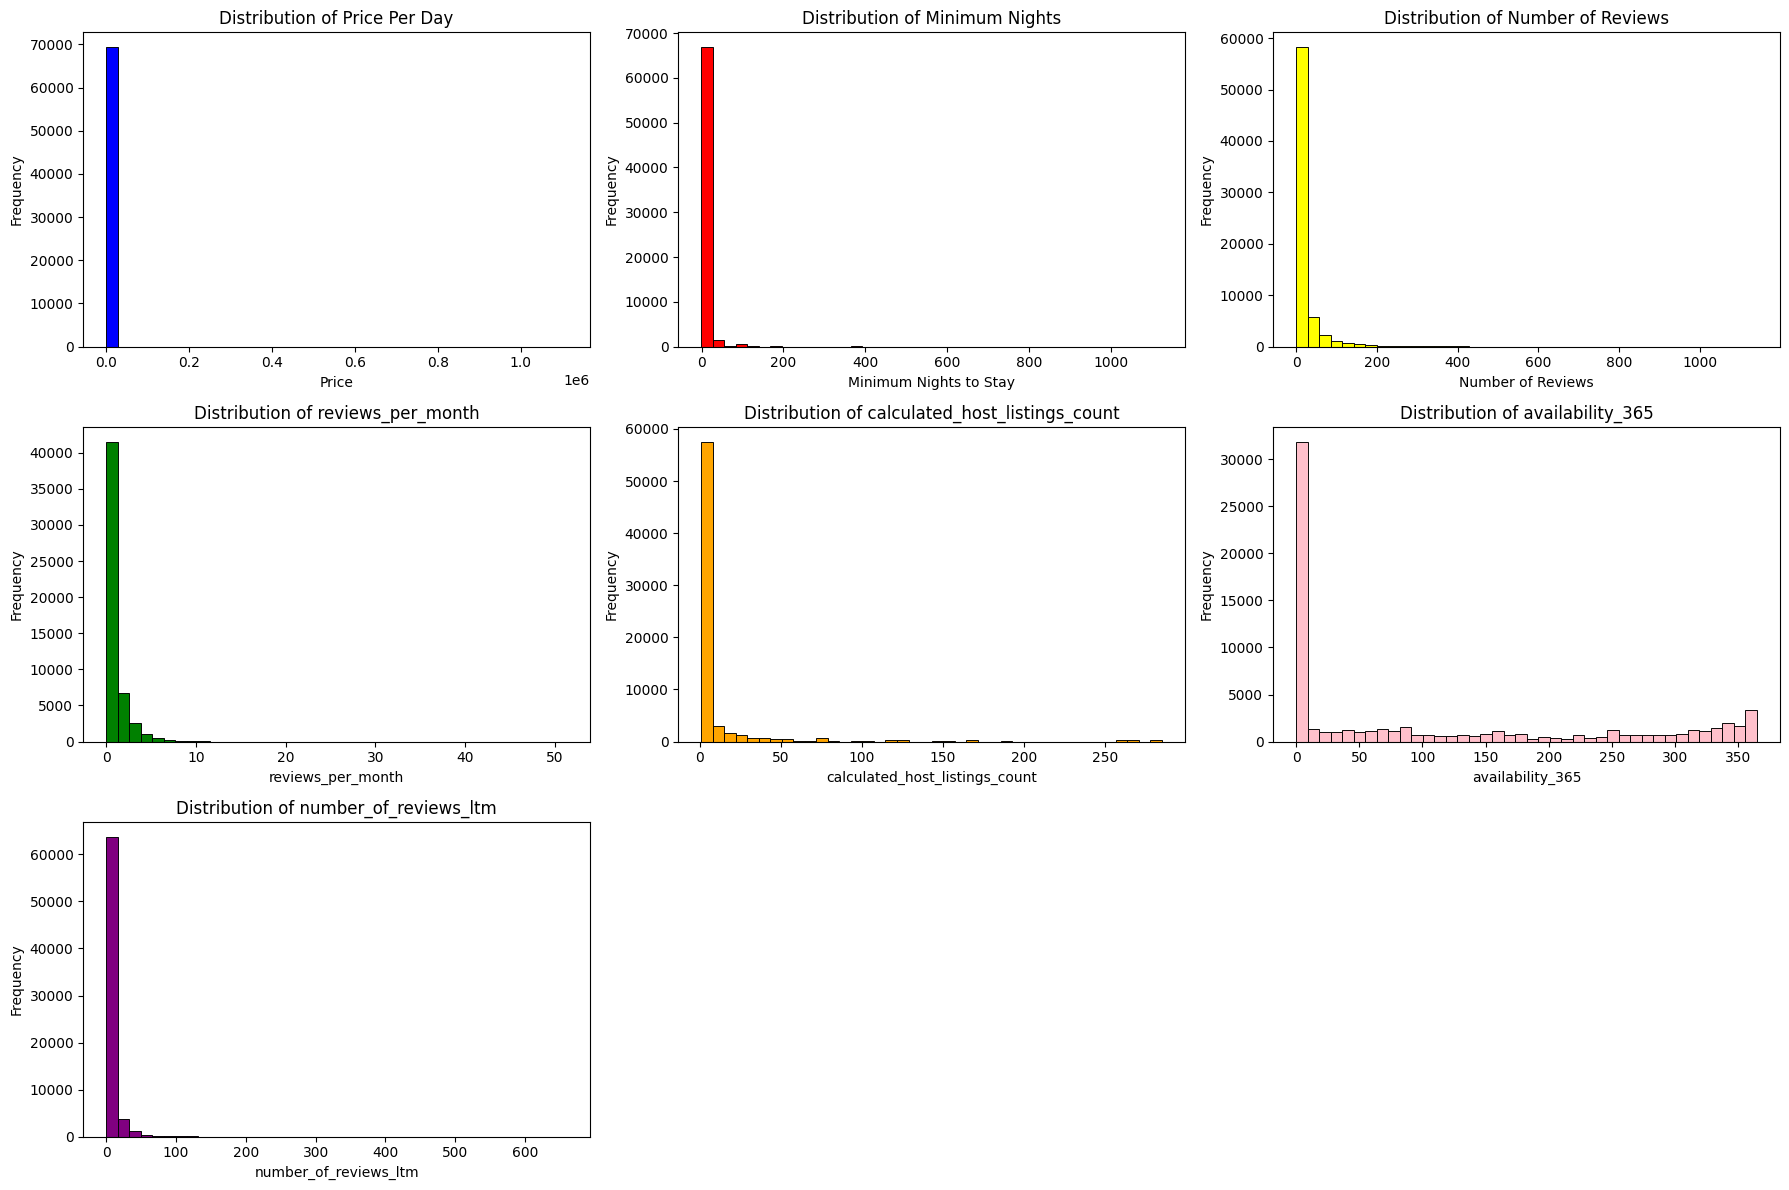

In [16]:
# This creates a histogram that shows the distribution of the price column.
fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # Total figure size
axes = axes.flatten()

# 1. Distribution of Price
# This creates a histogram that shows the distribution of the price column.
sns.histplot(df.price, bins=40, color='blue', alpha=1, ax=axes[0])
axes[0].set_ylabel('Frequency')  # Labels
axes[0].set_xlabel('Price')
axes[0].set_title('Distribution of Price Per Day')

# 2. Minimum Nights
sns.histplot(df.minimum_nights, bins=40, color='red', alpha=1, ax=axes[1])
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Minimum Nights to Stay')
axes[1].set_title('Distribution of Minimum Nights')

# 3. Number of Reviews
sns.histplot(df.number_of_reviews, bins=40, color='yellow', alpha=1, ax=axes[2])
axes[2].set_ylabel('Frequency')
axes[2].set_xlabel('Number of Reviews')
axes[2].set_title('Distribution of Number of Reviews')

# 4. Reviews per Month
sns.histplot(df.reviews_per_month, bins=40, color='green', alpha=1, ax=axes[3])
axes[3].set_ylabel('Frequency')
axes[3].set_xlabel('reviews_per_month')
axes[3].set_title('Distribution of reviews_per_month')

# 5. Calculated Host Listings Count
sns.histplot(df.calculated_host_listings_count, bins=40, color='orange', alpha=1, ax=axes[4])
axes[4].set_ylabel('Frequency')
axes[4].set_xlabel('calculated_host_listings_count')
axes[4].set_title('Distribution of calculated_host_listings_count')

# 6. Availability 365
sns.histplot(df.availability_365, bins=40, color='pink', alpha=1, ax=axes[5])
axes[5].set_ylabel('Frequency')
axes[5].set_xlabel('availability_365')
axes[5].set_title('Distribution of availability_365')

# 7. Number of Reviews (Last 12 Months)
sns.histplot(df.number_of_reviews_ltm, bins=40, color='purple', alpha=1, ax=axes[6])
axes[6].set_ylabel('Frequency')
axes[6].set_xlabel('number_of_reviews_ltm')
axes[6].set_title('Distribution of number_of_reviews_ltm')

# Remove any unused subplots
for i in range(7, 9):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


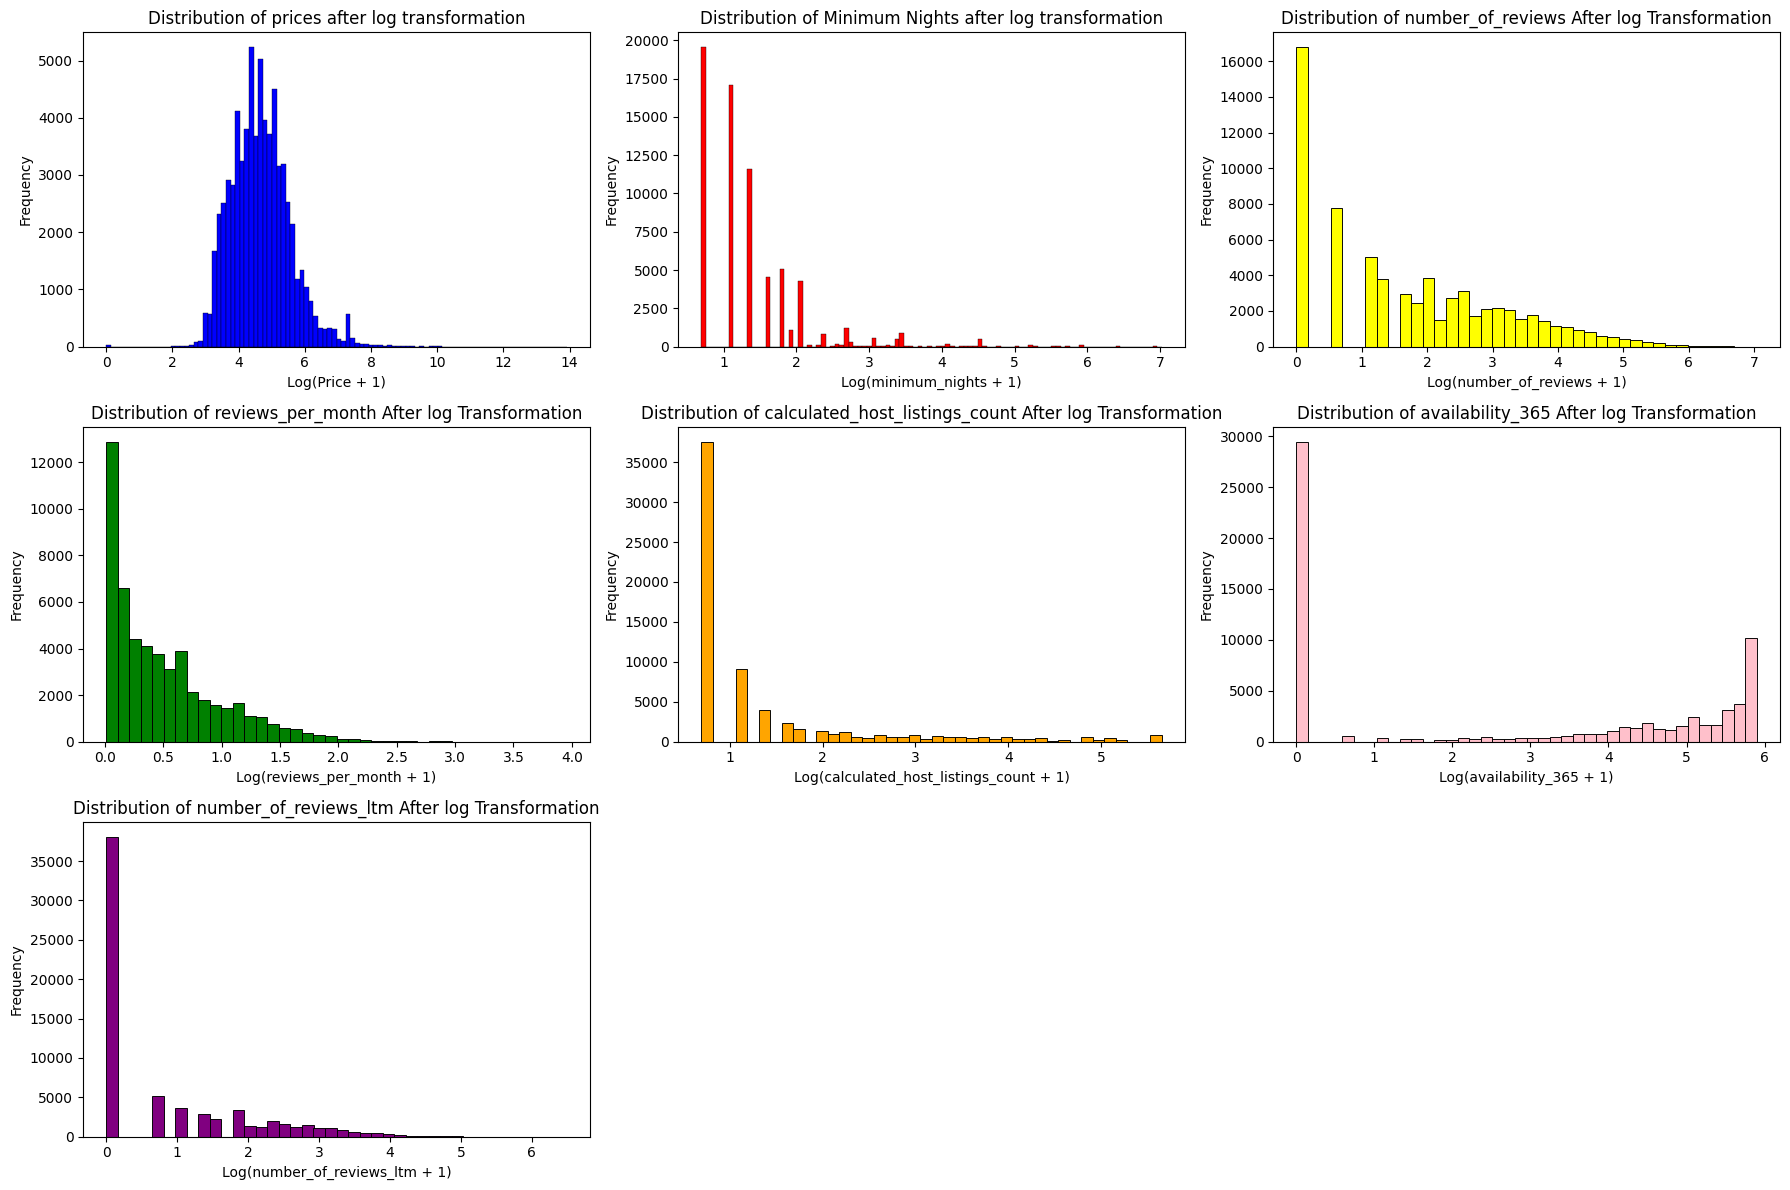

In [17]:
# Since the original data is heavily skewed and not clearly representative, we apply logarithmic transformation, log(price + 1), to handle zero or very small prices safely.
# Log-transforming the variables
log_price = np.log1p(df.price)
log_minimum_nights = np.log1p(df.minimum_nights)
log_number_of_reviews = np.log1p(df.number_of_reviews)
log_reviews_per_month = np.log1p(df.reviews_per_month)
log_calculated_host_listings_count = np.log1p(df.calculated_host_listings_count)
log_availability_365 = np.log1p(df.availability_365)
log_number_of_reviews_ltm = np.log1p(df.number_of_reviews_ltm)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # Total figure size
axes = axes.flatten()  # Flatten axes array for easy access

# 1. Price
# Since the original data is heavily skewed and not clearly representative, we apply logarithmic transformation, log(price + 1), to handle zero or very small prices safely.
sns.histplot(log_price, bins=100, color='blue', alpha=1, ax=axes[0])
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Log(Price + 1)')
axes[0].set_title('Distribution of prices after log transformation')

# 2. Minimum Nights
# Applying logarithmic transformation to have a clear view of the distribution.
sns.histplot(log_minimum_nights, bins=100, color='red', alpha=1, ax=axes[1])
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Log(minimum_nights + 1)')
axes[1].set_title('Distribution of Minimum Nights after log transformation')

# 3. Number of Reviews
sns.histplot(log_number_of_reviews, bins=40, color='yellow', alpha=1, ax=axes[2])
axes[2].set_ylabel('Frequency')
axes[2].set_xlabel('Log(number_of_reviews + 1)')
axes[2].set_title('Distribution of number_of_reviews After log Transformation')

# 4. Reviews per Month
sns.histplot(log_reviews_per_month, bins=40, color='green', alpha=1, ax=axes[3])
axes[3].set_ylabel('Frequency')
axes[3].set_xlabel('Log(reviews_per_month + 1)')
axes[3].set_title('Distribution of reviews_per_month After log Transformation')

# 5. Calculated Host Listings Count
sns.histplot(log_calculated_host_listings_count, bins=40, color='orange', alpha=1, ax=axes[4])
axes[4].set_ylabel('Frequency')
axes[4].set_xlabel('Log(calculated_host_listings_count + 1)')
axes[4].set_title('Distribution of calculated_host_listings_count After log Transformation')

# 6. Availability 365
sns.histplot(log_availability_365, bins=40, color='pink', alpha=1, ax=axes[5])
axes[5].set_ylabel('Frequency')
axes[5].set_xlabel('Log(availability_365 + 1)')
axes[5].set_title('Distribution of availability_365 After log Transformation')

# 7. Number of Reviews (LTM)
sns.histplot(log_number_of_reviews_ltm, bins=40, color='purple', alpha=1, ax=axes[6])
axes[6].set_ylabel('Frequency')
axes[6].set_xlabel('Log(number_of_reviews_ltm + 1)')
axes[6].set_title('Distribution of number_of_reviews_ltm After log Transformation')

# Remove any unused subplots
for i in range(7, 9):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

**MISSING VALUE CHECK**

In [18]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,6.935100e+04,69330,6.935100e+04,69346,0.0,69351,69351.000000,69351.000000,69351,6.934900e+04,69351.000000,69351.000000,52571,52571.000000,69351.000000,69351.000000,69351.000000,0.0
unique,NaN,66404,NaN,13030,NaN,33,NaN,NaN,4,NaN,NaN,NaN,2728,NaN,NaN,NaN,NaN,NaN
top,NaN,✿♫✯very_nice_room_near_red_cross_garden_park✯♫✿,NaN,alex,NaN,westminster,NaN,NaN,entire_home/apt,NaN,NaN,NaN,2022-09-04,NaN,NaN,NaN,NaN,NaN
freq,NaN,115,NaN,524,NaN,7763,NaN,NaN,41224,NaN,NaN,NaN,1215,NaN,NaN,NaN,NaN,NaN
mean,1.373703e+17,NaN,1.242124e+08,NaN,NaN,NaN,51.509544,-0.128489,NaN,1.932243e+02,5.997462,17.537051,NaN,0.882593,11.987498,108.520266,4.734438,NaN
std,2.651479e+17,NaN,1.377104e+08,NaN,NaN,NaN,0.049182,0.100957,NaN,4.238749e+03,25.709524,40.410763,NaN,1.274510,37.148839,132.821088,12.032502,NaN
min,1.391300e+04,NaN,4.775000e+03,NaN,NaN,NaN,51.272480,-0.523600,NaN,-6.000000e+01,-1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.810090e+07,NaN,1.870718e+07,NaN,NaN,NaN,51.483140,-0.189520,NaN,5.500000e+01,1.000000,1.000000,NaN,0.120000,1.000000,0.000000,0.000000,NaN
50%,3.395467e+07,NaN,6.010350e+07,NaN,NaN,NaN,51.513600,-0.126200,NaN,1.000000e+02,2.000000,4.000000,NaN,0.430000,1.000000,32.000000,0.000000,NaN
75%,5.265645e+07,NaN,1.960405e+08,NaN,NaN,NaN,51.539710,-0.068550,NaN,1.800000e+02,4.000000,16.000000,NaN,1.080000,4.000000,228.000000,5.000000,NaN


In [19]:
# Checking for the amount of missing values in the columns
df.isnull().sum()

id                                    0
name                                 21
host_id                               0
host_name                             5
neighbourhood_group               69351
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 2
minimum_nights                        0
number_of_reviews                     0
last_review                       16780
reviews_per_month                 16780
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           69351
dtype: int64

In [20]:
# printing the amount of missing values and the percentage in comparrison to the total data in the feature.
for col in df.columns:
    num_missing = df[col].isnull().sum()
    percentage = (num_missing / len(df)) * 100
    print(f"{col}: missing = {num_missing} ({percentage:.1f}%)")

id: missing = 0 (0.0%)
name: missing = 21 (0.0%)
host_id: missing = 0 (0.0%)
host_name: missing = 5 (0.0%)
neighbourhood_group: missing = 69351 (100.0%)
neighbourhood: missing = 0 (0.0%)
latitude: missing = 0 (0.0%)
longitude: missing = 0 (0.0%)
room_type: missing = 0 (0.0%)
price: missing = 2 (0.0%)
minimum_nights: missing = 0 (0.0%)
number_of_reviews: missing = 0 (0.0%)
last_review: missing = 16780 (24.2%)
reviews_per_month: missing = 16780 (24.2%)
calculated_host_listings_count: missing = 0 (0.0%)
availability_365: missing = 0 (0.0%)
number_of_reviews_ltm: missing = 0 (0.0%)
license: missing = 69351 (100.0%)


In [21]:
# Removing the columns 'neighbourhood_group' and 'license' as they have no data
df.drop(['neighbourhood_group','license'], axis =1, inplace=True)
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,106332,"lovely_large_room,_bethnal_green",264345,susie,tower_hamlets,51.52874,-0.05396,private_room,55.0,3,65,2016-06-10,0.47,1,74,0
1,13913,holiday_london_db_room_let-on_going,54730,alina,islington,51.56861,-0.11270,private_room,50.0,1,30,2022-07-15,0.20,2,343,9
2,284532,cosy_studio-flat_with_a_great__view,1481412,luca,tower_hamlets,51.52851,-0.07426,entire_home/apt,90.0,5,42,2022-01-04,0.34,1,222,1
3,107048,a_luxury_studio_suite_in_clerkenwell,259088,simon,islington,51.52478,-0.10484,private_room,180.0,4,493,2022-09-02,3.59,5,236,20
4,284603,notting_hill_church_stay_in_heaven!,1481851,tania,kensington_and_chelsea,51.51464,-0.20004,entire_home/apt,297.0,14,6,2022-07-04,0.05,1,180,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69349,9671724,"cozy_room_in_greenwich,_river_view",49977905,kurt,greenwich,51.48300,-0.01346,private_room,55.0,5,67,2021-10-03,0.84,3,0,1
69350,20277958,river_view_tate_modern,1132775,mark,southwark,51.50914,-0.10192,entire_home/apt,201.0,3,61,2022-09-09,0.99,1,0,12
69351,20512703,"luxury_4_bed_house,_100m_to_river_and_palace",1706966,asher_&_aileen,richmond_upon_thames,51.40571,-0.35325,entire_home/apt,246.0,3,6,2022-08-31,1.49,1,4,6
69352,49698549,waterfront_hampton_stay,34213667,alan,richmond_upon_thames,51.41029,-0.35975,entire_home/apt,250.0,3,9,2022-07-18,0.61,1,2,4


In [22]:
# Keeping the rows in the DataFrame where the price is greater than 0 and the minimum_nights is greater than 0. 
df = df[df['price'] > 0]
df = df[df['minimum_nights'] > 0]
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,106332,"lovely_large_room,_bethnal_green",264345,susie,tower_hamlets,51.52874,-0.05396,private_room,55.0,3,65,2016-06-10,0.47,1,74,0
1,13913,holiday_london_db_room_let-on_going,54730,alina,islington,51.56861,-0.11270,private_room,50.0,1,30,2022-07-15,0.20,2,343,9
2,284532,cosy_studio-flat_with_a_great__view,1481412,luca,tower_hamlets,51.52851,-0.07426,entire_home/apt,90.0,5,42,2022-01-04,0.34,1,222,1
3,107048,a_luxury_studio_suite_in_clerkenwell,259088,simon,islington,51.52478,-0.10484,private_room,180.0,4,493,2022-09-02,3.59,5,236,20
4,284603,notting_hill_church_stay_in_heaven!,1481851,tania,kensington_and_chelsea,51.51464,-0.20004,entire_home/apt,297.0,14,6,2022-07-04,0.05,1,180,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69349,9671724,"cozy_room_in_greenwich,_river_view",49977905,kurt,greenwich,51.48300,-0.01346,private_room,55.0,5,67,2021-10-03,0.84,3,0,1
69350,20277958,river_view_tate_modern,1132775,mark,southwark,51.50914,-0.10192,entire_home/apt,201.0,3,61,2022-09-09,0.99,1,0,12
69351,20512703,"luxury_4_bed_house,_100m_to_river_and_palace",1706966,asher_&_aileen,richmond_upon_thames,51.40571,-0.35325,entire_home/apt,246.0,3,6,2022-08-31,1.49,1,4,6
69352,49698549,waterfront_hampton_stay,34213667,alan,richmond_upon_thames,51.41029,-0.35975,entire_home/apt,250.0,3,9,2022-07-18,0.61,1,2,4


In [23]:
# Creating an IterativeImputer object that will fill in missing values in the data by predicting them using a Linear Regression model.
imputer = IterativeImputer(estimator = LinearRegression(), max_iter=10)

**Applying Iterative Imputer to fill in missing values**

In [24]:
# Here we slects the columns 'price' and 'reviews_per_month' and save them as empty_cells. Then use an imputer to learn how to fill missing values in those columns based on the available data.
empty_cells = df[['price', 'reviews_per_month']]
imputer.fit(empty_cells)

,estimator,LinearRegression()
,missing_values,nan
,sample_posterior,False
,max_iter,10
,tol,0.001
,n_nearest_features,None
,initial_strategy,'mean'
,fill_value,None
,imputation_order,'ascending'
,skip_complete,False
,min_value,-inf


In [25]:
#filling the missing values in empty_cells and storing the completed data in Xtrans.
Xtrans = imputer.fit_transform(empty_cells)

In [26]:
# Taking the imputed data in Xtrans (a NumPy array) and converts it into a Pandas DataFrame with the column names 'price' and 'reviews_per_month'.
Xtrans = pd.DataFrame(Xtrans, columns=['price', 'reviews_per_month'])

In [27]:
print(Xtrans)

       price  reviews_per_month
0       55.0               0.47
1       50.0               0.20
2       90.0               0.34
3      180.0               3.59
4      297.0               0.05
...      ...                ...
69323   55.0               0.84
69324  201.0               0.99
69325  246.0               1.49
69326  250.0               0.61
69327  134.0               2.45

[69328 rows x 2 columns]


**Correcting missing values in last review column**

In [28]:
df['last_review'] = pd.to_datetime(df['last_review']) # Converting the 'last_review' column to datetime format.
df['last_review'].fillna(pd.Timestamp('2022-09-04'), inplace=True) #Replaceing any missing (NaN) values in the 'last_review' column with the date 2022-09-04(the top value)

/var/folders/ty/47wsyy_916d2ftsgbw8v8wxc0000gn/T/ipykernel_1907/1267542370.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_review'].fillna(pd.Timestamp('2022-09-04'), inplace=True) #Replaceing any missing (NaN) values in the 'last_review' column with the date 2022-09-04(the top value)


In [29]:
# Removing the columns price and reviews per month from the dataframe, in order not to have duplicate columns.
df = df.drop(['price', 'reviews_per_month'], axis = 1, errors='ignore') # axis=1 in order to drop the columns and not the rows.

In [30]:
# Checking the dataset to see if they have been removed correctly.
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,106332,"lovely_large_room,_bethnal_green",264345,susie,tower_hamlets,51.52874,-0.05396,private_room,3,65,2016-06-10,1,74,0
1,13913,holiday_london_db_room_let-on_going,54730,alina,islington,51.56861,-0.11270,private_room,1,30,2022-07-15,2,343,9
2,284532,cosy_studio-flat_with_a_great__view,1481412,luca,tower_hamlets,51.52851,-0.07426,entire_home/apt,5,42,2022-01-04,1,222,1
3,107048,a_luxury_studio_suite_in_clerkenwell,259088,simon,islington,51.52478,-0.10484,private_room,4,493,2022-09-02,5,236,20
4,284603,notting_hill_church_stay_in_heaven!,1481851,tania,kensington_and_chelsea,51.51464,-0.20004,entire_home/apt,14,6,2022-07-04,1,180,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69349,9671724,"cozy_room_in_greenwich,_river_view",49977905,kurt,greenwich,51.48300,-0.01346,private_room,5,67,2021-10-03,3,0,1
69350,20277958,river_view_tate_modern,1132775,mark,southwark,51.50914,-0.10192,entire_home/apt,3,61,2022-09-09,1,0,12
69351,20512703,"luxury_4_bed_house,_100m_to_river_and_palace",1706966,asher_&_aileen,richmond_upon_thames,51.40571,-0.35325,entire_home/apt,3,6,2022-08-31,1,4,6
69352,49698549,waterfront_hampton_stay,34213667,alan,richmond_upon_thames,51.41029,-0.35975,entire_home/apt,3,9,2022-07-18,1,2,4


In [31]:
# Resetting the index for df and Xtrans in order to realign
df.reset_index(drop=True, inplace=True)
Xtrans.reset_index(drop=True, inplace=True)

In [32]:
# We combine the two DataFrames df and Xtrans side by side into a new DataFrame df_combined
df_combined = pd.concat([df, Xtrans], axis=1)
df_combined

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price,reviews_per_month
0,106332,"lovely_large_room,_bethnal_green",264345,susie,tower_hamlets,51.52874,-0.05396,private_room,3,65,2016-06-10,1,74,0,55.0,0.47
1,13913,holiday_london_db_room_let-on_going,54730,alina,islington,51.56861,-0.11270,private_room,1,30,2022-07-15,2,343,9,50.0,0.20
2,284532,cosy_studio-flat_with_a_great__view,1481412,luca,tower_hamlets,51.52851,-0.07426,entire_home/apt,5,42,2022-01-04,1,222,1,90.0,0.34
3,107048,a_luxury_studio_suite_in_clerkenwell,259088,simon,islington,51.52478,-0.10484,private_room,4,493,2022-09-02,5,236,20,180.0,3.59
4,284603,notting_hill_church_stay_in_heaven!,1481851,tania,kensington_and_chelsea,51.51464,-0.20004,entire_home/apt,14,6,2022-07-04,1,180,2,297.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69323,9671724,"cozy_room_in_greenwich,_river_view",49977905,kurt,greenwich,51.48300,-0.01346,private_room,5,67,2021-10-03,3,0,1,55.0,0.84
69324,20277958,river_view_tate_modern,1132775,mark,southwark,51.50914,-0.10192,entire_home/apt,3,61,2022-09-09,1,0,12,201.0,0.99
69325,20512703,"luxury_4_bed_house,_100m_to_river_and_palace",1706966,asher_&_aileen,richmond_upon_thames,51.40571,-0.35325,entire_home/apt,3,6,2022-08-31,1,4,6,246.0,1.49
69326,49698549,waterfront_hampton_stay,34213667,alan,richmond_upon_thames,51.41029,-0.35975,entire_home/apt,3,9,2022-07-18,1,2,4,250.0,0.61


**ISOLATION FOREST FOR OUTLIER DETECTION** 

In [33]:
exclude = ['id', 'host_id','latitude','longitude'] #for outlier detection we must leave out these columns as there is not any to detect 
numeric_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in exclude] #attaining the numeric columns besides the excluded ones above
X = df_combined[numeric_cols] #extracting the numeric columns from df_combined

In [34]:
# Applying isolation forest to detect outliers
iso_forest = IsolationForest(contamination=0.01, random_state=42) #taking 50% of the whole data as outliers through contamination=0.5. random state = 42 will ensure random sampling happens the same way each run.
outlier_pred = iso_forest.fit_predict(X) #Fits the model to the data X and predicts outliers

In [35]:
# Adding the outlier_pred results as a new column called 'outlier' in the df_combined DataFram
df_combined['outlier'] = outlier_pred

In [36]:
# Filtering out the outliers from df_combined and only keeping the rows where 'outlier' == 1 the non-outlier points 
df_clean = df_combined[df_combined['outlier'] == 1].copy() # .copy() will create a new independent DataFrame called df_clean.

**Plotting the graph of Price and Reviews per month to show before and after outlier removal**

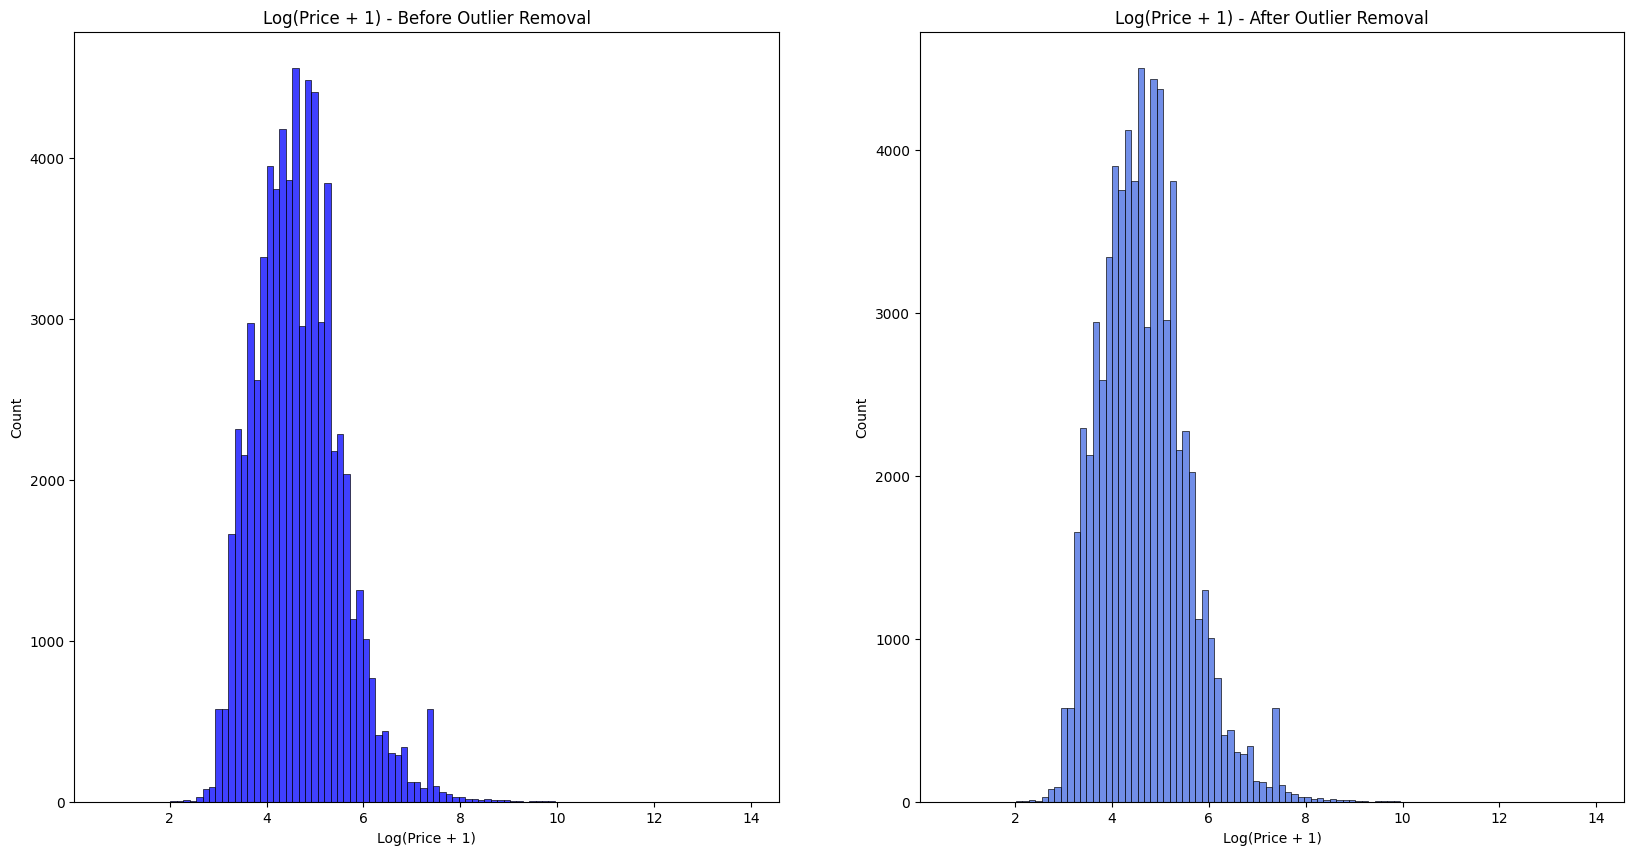

In [37]:
plt.figure(figsize=(20, 10)) ## Setting the overall figure size to be 20x10 inches

# Left graph: before outlier removal of price (log-transformed)
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df_combined['price']), bins=100, color='blue')
plt.title("Log(Price + 1) - Before Outlier Removal")
plt.xlabel("Log(Price + 1)")

# Right graph: after outlier removal of price (log-transformed)
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df_clean['price']), bins=100, color='royalblue')
plt.title("Log(Price + 1) - After Outlier Removal")
plt.xlabel("Log(Price + 1)")

plt.show()

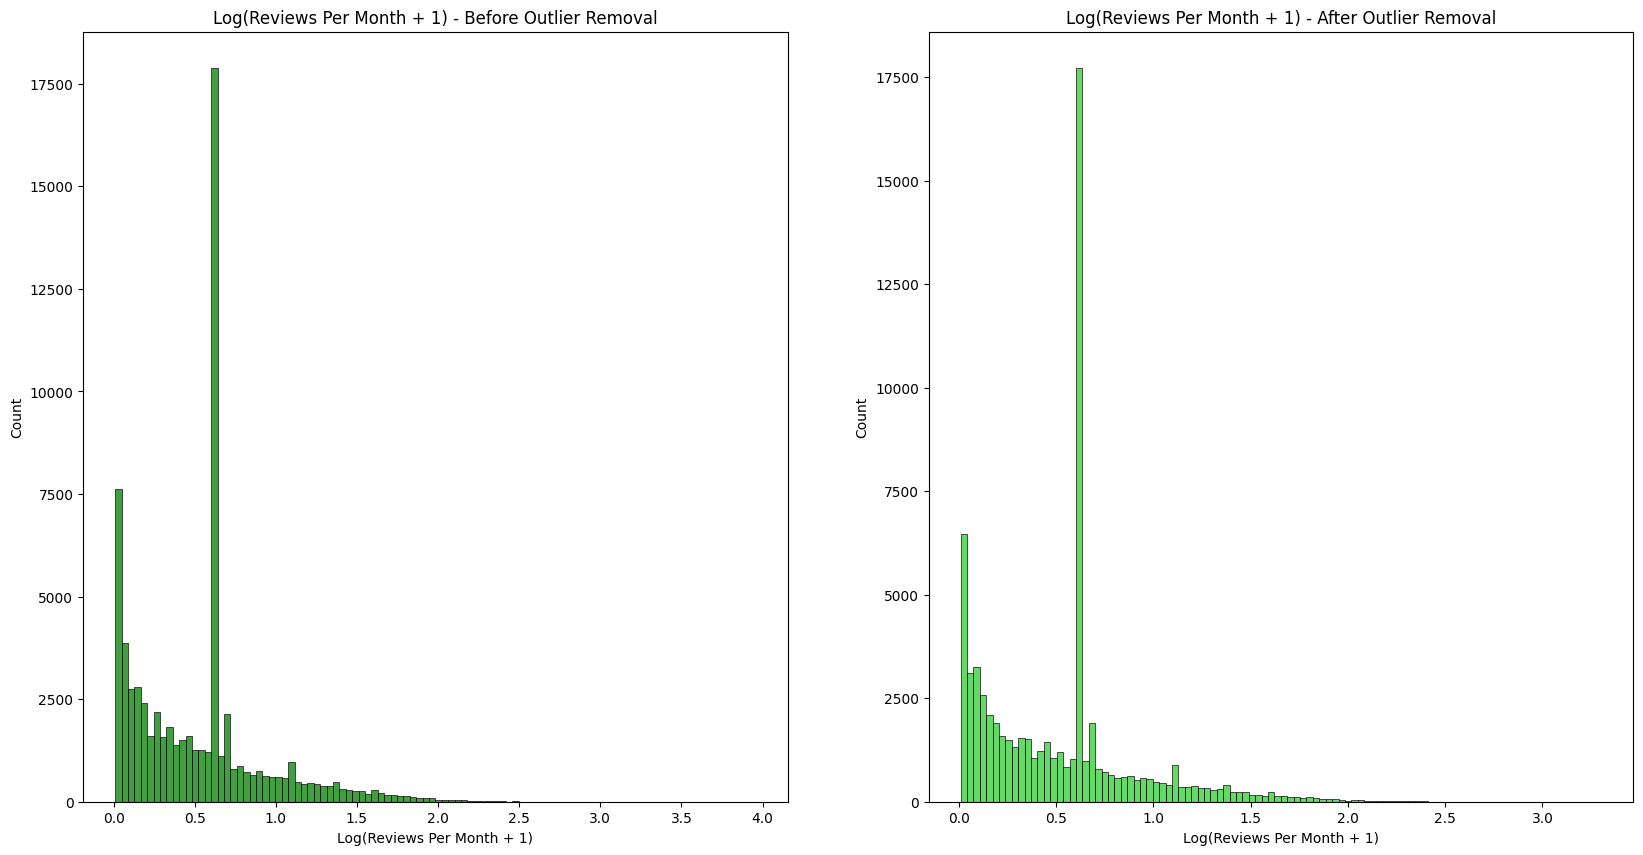

In [38]:
plt.figure(figsize=(20, 10))

# Left graph: before outlier removal of reviews per month (log-transformed)
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df_combined['reviews_per_month']), bins=100, color='green')
plt.title("Log(Reviews Per Month + 1) - Before Outlier Removal")
plt.xlabel("Log(Reviews Per Month + 1)")

# Right: after outlier removal of reviews per month (log-transformed)
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df_clean['reviews_per_month']), bins=100, color='limegreen')
plt.title("Log(Reviews Per Month + 1) - After Outlier Removal")
plt.xlabel("Log(Reviews Per Month + 1)")

plt.show()

In [39]:
# Observing the number of outliers that have been removed
print((df_combined['outlier'] == -1).sum())

681


In [40]:
# Observing the resulting dataset.
df_combined

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price,reviews_per_month,outlier
0,106332,"lovely_large_room,_bethnal_green",264345,susie,tower_hamlets,51.52874,-0.05396,private_room,3,65,2016-06-10,1,74,0,55.0,0.47,1
1,13913,holiday_london_db_room_let-on_going,54730,alina,islington,51.56861,-0.11270,private_room,1,30,2022-07-15,2,343,9,50.0,0.20,1
2,284532,cosy_studio-flat_with_a_great__view,1481412,luca,tower_hamlets,51.52851,-0.07426,entire_home/apt,5,42,2022-01-04,1,222,1,90.0,0.34,1
3,107048,a_luxury_studio_suite_in_clerkenwell,259088,simon,islington,51.52478,-0.10484,private_room,4,493,2022-09-02,5,236,20,180.0,3.59,-1
4,284603,notting_hill_church_stay_in_heaven!,1481851,tania,kensington_and_chelsea,51.51464,-0.20004,entire_home/apt,14,6,2022-07-04,1,180,2,297.0,0.05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69323,9671724,"cozy_room_in_greenwich,_river_view",49977905,kurt,greenwich,51.48300,-0.01346,private_room,5,67,2021-10-03,3,0,1,55.0,0.84,1
69324,20277958,river_view_tate_modern,1132775,mark,southwark,51.50914,-0.10192,entire_home/apt,3,61,2022-09-09,1,0,12,201.0,0.99,1
69325,20512703,"luxury_4_bed_house,_100m_to_river_and_palace",1706966,asher_&_aileen,richmond_upon_thames,51.40571,-0.35325,entire_home/apt,3,6,2022-08-31,1,4,6,246.0,1.49,1
69326,49698549,waterfront_hampton_stay,34213667,alan,richmond_upon_thames,51.41029,-0.35975,entire_home/apt,3,9,2022-07-18,1,2,4,250.0,0.61,1


In [41]:
df_combined.to_csv('df_combined.csv', index=False)


## 4. Data Transformation
Here we apply transformations such as encoding categorical variables and scaling numerical values.

**NORMALIZING THE DATA**

**ONE-HOT ENCODER TO CREAT DUMMY VARIABLES**

In [42]:
# Selecting the two categorical columns 'neigbourhood' and 'room type' and applying one-hot encoder to get dummy variables. 
encoded = pd.get_dummies(df_clean[['neighbourhood', 'room_type']],prefix=['neighbourhood', 'room_type'], drop_first=True)

In [43]:
# Removing the columns neighbourhood and room type in order to avoid duplicated columns after one-hot encoding
df_clean = df_clean.drop(['neighbourhood', 'room_type'], axis=1)

In [44]:
# Joining the encoded data with dummy variables and the total dataset without the columns neigbourhood and room type
df_final = pd.concat([df_clean, encoded], axis=1)
df_final

,id,name,host_id,host_name,latitude,longitude,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,...,neighbourhood_richmond_upon_thames,neighbourhood_southwark,neighbourhood_sutton,neighbourhood_tower_hamlets,neighbourhood_waltham_forest,neighbourhood_wandsworth,neighbourhood_westminster,room_type_hotel_room,room_type_private_room,room_type_shared_room
0,106332,"lovely_large_room,_bethnal_green",264345,susie,51.52874,-0.05396,3,65,2016-06-10,1,...,False,False,False,True,False,False,False,False,True,False
1,13913,holiday_london_db_room_let-on_going,54730,alina,51.56861,-0.11270,1,30,2022-07-15,2,...,False,False,False,False,False,False,False,False,True,False
2,284532,cosy_studio-flat_with_a_great__view,1481412,luca,51.52851,-0.07426,5,42,2022-01-04,1,...,False,False,False,True,False,False,False,False,False,False
4,284603,notting_hill_church_stay_in_heaven!,1481851,tania,51.51464,-0.20004,14,6,2022-07-04,1,...,False,False,False,False,False,False,False,False,False,False
5,15400,bright_chelsea__apartment._chelsea!,60302,philippa,51.48780,-0.16813,3,89,2020-03-16,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69323,9671724,"cozy_room_in_greenwich,_river_view",49977905,kurt,51.48300,-0.01346,5,67,2021-10-03,3,...,False,False,False,False,False,False,False,False,True,False
69324,20277958,river_view_tate_modern,1132775,mark,51.50914,-0.10192,3,61,2022-09-09,1,...,False,True,False,False,False,False,False,False,False,False
69325,20512703,"luxury_4_bed_house,_100m_to_river_and_palace",1706966,asher_&_aileen,51.40571,-0.35325,3,6,2022-08-31,1,...,True,False,False,False,False,False,False,False,False,False
69326,49698549,waterfront_hampton_stay,34213667,alan,51.41029,-0.35975,3,9,2022-07-18,1,...,True,False,False,False,False,False,False,False,False,False


In [45]:
# Converting all columns that start with neighbourhood and room type and converts the values to binary integers (0 or 1 for False or True)
one_hot_cols = [col for col in df_final.columns if col.startswith('neighbourhood_') or col.startswith('room_type_')]
df_final[one_hot_cols] = df_final[one_hot_cols].astype(int)

In [46]:
# Our final dataset
df_final

,id,name,host_id,host_name,latitude,longitude,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,...,neighbourhood_richmond_upon_thames,neighbourhood_southwark,neighbourhood_sutton,neighbourhood_tower_hamlets,neighbourhood_waltham_forest,neighbourhood_wandsworth,neighbourhood_westminster,room_type_hotel_room,room_type_private_room,room_type_shared_room
0,106332,"lovely_large_room,_bethnal_green",264345,susie,51.52874,-0.05396,3,65,2016-06-10,1,...,0,0,0,1,0,0,0,0,1,0
1,13913,holiday_london_db_room_let-on_going,54730,alina,51.56861,-0.11270,1,30,2022-07-15,2,...,0,0,0,0,0,0,0,0,1,0
2,284532,cosy_studio-flat_with_a_great__view,1481412,luca,51.52851,-0.07426,5,42,2022-01-04,1,...,0,0,0,1,0,0,0,0,0,0
4,284603,notting_hill_church_stay_in_heaven!,1481851,tania,51.51464,-0.20004,14,6,2022-07-04,1,...,0,0,0,0,0,0,0,0,0,0
5,15400,bright_chelsea__apartment._chelsea!,60302,philippa,51.48780,-0.16813,3,89,2020-03-16,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69323,9671724,"cozy_room_in_greenwich,_river_view",49977905,kurt,51.48300,-0.01346,5,67,2021-10-03,3,...,0,0,0,0,0,0,0,0,1,0
69324,20277958,river_view_tate_modern,1132775,mark,51.50914,-0.10192,3,61,2022-09-09,1,...,0,1,0,0,0,0,0,0,0,0
69325,20512703,"luxury_4_bed_house,_100m_to_river_and_palace",1706966,asher_&_aileen,51.40571,-0.35325,3,6,2022-08-31,1,...,1,0,0,0,0,0,0,0,0,0
69326,49698549,waterfront_hampton_stay,34213667,alan,51.41029,-0.35975,3,9,2022-07-18,1,...,1,0,0,0,0,0,0,0,0,0


**Bar Plots of the categorical values Neighbourhood and Room Type**

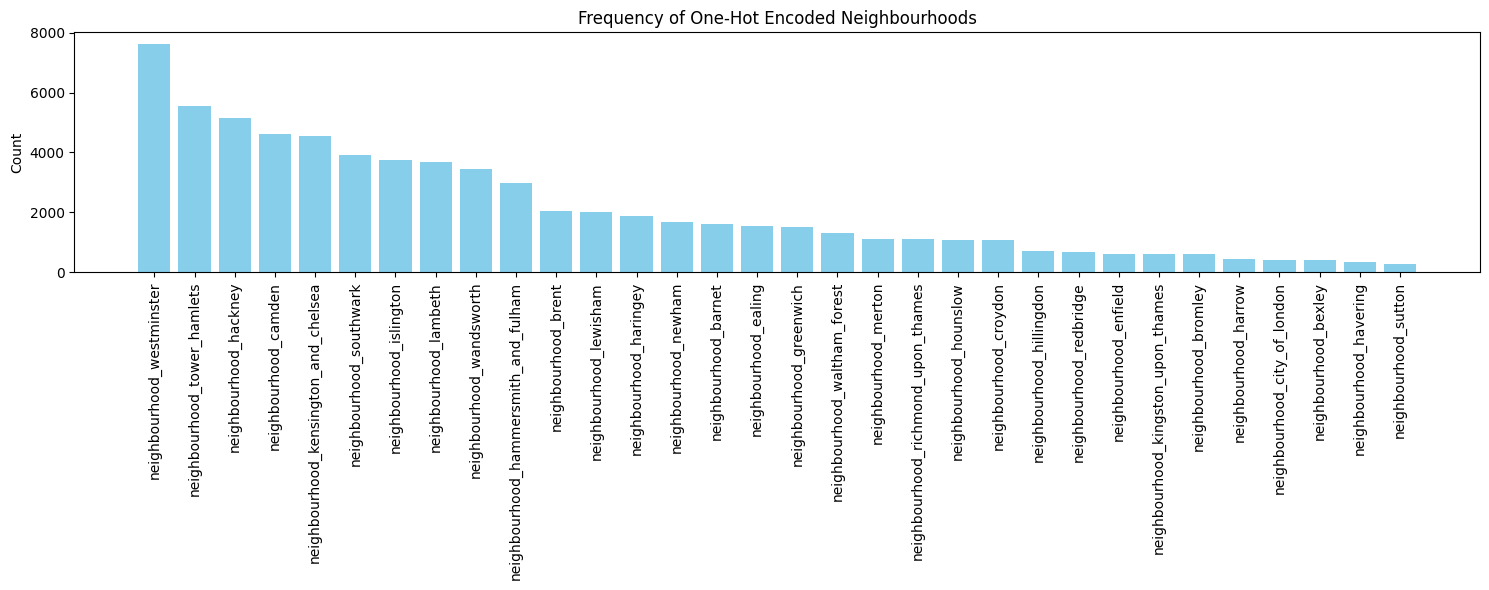

In [47]:
# Visualizing the categorical values for the different neighbourhood values using bar plot
neighbourhood_cols = [col for col in one_hot_cols if col.startswith('neighbourhood_')]
neighbourhood_counts = df_final[neighbourhood_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(neighbourhood_counts.index, neighbourhood_counts.values, color='skyblue')
plt.title("Frequency of One-Hot Encoded Neighbourhoods")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

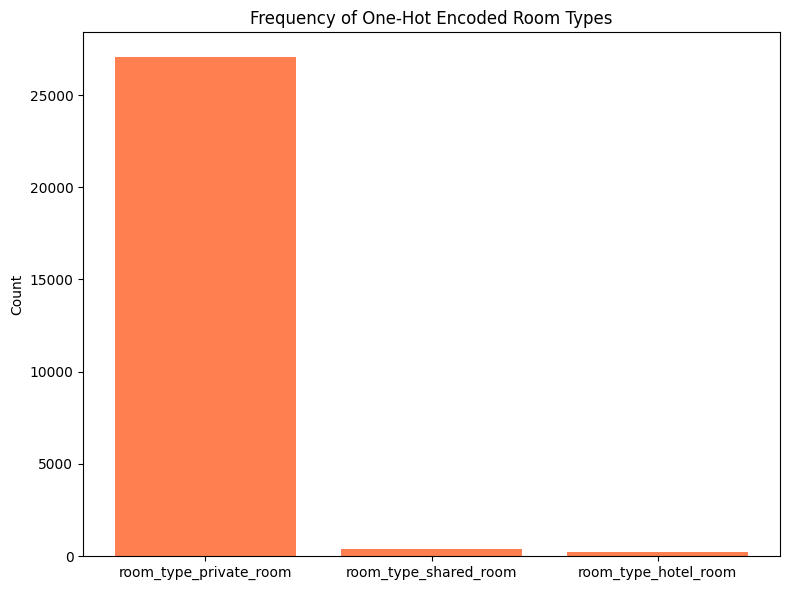

In [48]:
room_type_cols = [col for col in one_hot_cols if col.startswith('room_type_')]
room_type_counts = df_final[room_type_cols].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(room_type_counts.index, room_type_counts.values, color='coral')
plt.title("Frequency of One-Hot Encoded Room Types")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [49]:
print(df_final.columns.tolist())

['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'last_review', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'price', 'reviews_per_month', 'outlier', 'neighbourhood_barnet', 'neighbourhood_bexley', 'neighbourhood_brent', 'neighbourhood_bromley', 'neighbourhood_camden', 'neighbourhood_city_of_london', 'neighbourhood_croydon', 'neighbourhood_ealing', 'neighbourhood_enfield', 'neighbourhood_greenwich', 'neighbourhood_hackney', 'neighbourhood_hammersmith_and_fulham', 'neighbourhood_haringey', 'neighbourhood_harrow', 'neighbourhood_havering', 'neighbourhood_hillingdon', 'neighbourhood_hounslow', 'neighbourhood_islington', 'neighbourhood_kensington_and_chelsea', 'neighbourhood_kingston_upon_thames', 'neighbourhood_lambeth', 'neighbourhood_lewisham', 'neighbourhood_merton', 'neighbourhood_newham', 'neighbourhood_redbridge', 'neighbourhood_richmond_upon_thames', 'neighbourhood_southwark', 'neighbourhood_sut